In [1]:
# IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "white")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
train = pd.read_csv("final_train.csv")

In [5]:
y = train.LoanStatus
X = train.drop("LoanStatus", axis = 1)

In [8]:
X = pd.get_dummies(X)

### CHECK CROSS VALIDATION SCORES WITH DIFFERENT ALGORITHMS

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
all_scores = {}

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [16]:
names = ['LR','KNN','NB','DT','SVC']
clfs =  [LogisticRegression(max_iter=200), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(max_depth=5),LinearSVC(max_iter=2000)]

In [25]:
for clf, name in zip(clfs, names):
    scores = cross_val_score(clf, X_scaled, y, cv = 5)
    print(scores)
    print(f"{name}  = {scores.mean()*100:0.2f}")
    all_scores[name] = (scores.mean() * 100)

[0.83185841 0.76106195 0.78761062 0.84955752 0.83928571]
LR  = 81.39
[0.7699115  0.7079646  0.72566372 0.76106195 0.75      ]
KNN  = 74.29
[0.81415929 0.74336283 0.78761062 0.85840708 0.8125    ]
NB  = 80.32
[0.83185841 0.75221239 0.83185841 0.83185841 0.82142857]
DT  = 81.38
[0.83185841 0.76106195 0.78761062 0.85840708 0.83928571]
SVC  = 81.56


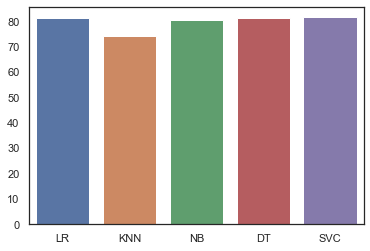

In [28]:
plt = sns.barplot(x =list(all_scores.keys()), y = list(all_scores.values()))

### LOGISTIC REGRESSION WITH BUILT-IN CROSS VALIDATION

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((423, 16), (141, 16), (423,), (141,))

In [47]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 5).fit(X_train, y_train)

In [48]:
score = clf.score(X_train, y_train)
print(f"Accuracy Score  :", score) 

Accuracy Score  : 0.806146572104019


In [49]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 5, max_iter = 500).fit(X_train, y_train)

In [50]:
score = clf.score(X_train, y_train)
print(f"Accuracy Score  :", score)

Accuracy Score  : 0.806146572104019


### TESTING WITH TEST DATA

In [51]:
y_pred = clf.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[23, 19],
       [ 4, 95]], dtype=int64)

In [56]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.55      0.67        42\n           1       0.83      0.96      0.89        99\n\n    accuracy                           0.84       141\n   macro avg       0.84      0.75      0.78       141\nweighted avg       0.84      0.84      0.82       141\n'

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        42
           1       0.83      0.96      0.89        99

    accuracy                           0.84       141
   macro avg       0.84      0.75      0.78       141
weighted avg       0.84      0.84      0.82       141

